In [1]:
import pandas as pd
from constants import *
import pylab
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
IDEOTYPES = {'T' : 'blue',
             'dT' : 'red',
             'C' : 'green',
             'B' : 'yellow'}
CONDITIONS = {'S' : 'Yellow', 'C': 'Blue'}

In [3]:
best_of_best_df = pd.read_csv('%s/best_of_best.csv' % RESULTS_DIR, skipinitialspace=True)
best_of_best_df

,arbor name,optimal G,optimal alpha,optimal pt distance
0,043_5_S_day5,-0.2714,0.6500,0.000036
1,091_4_S_day5,0.1887,0.2887,5.835172
2,022_5_C_day5,-0.0286,0.5214,5.382678
3,220_1_C_day5,-0.1827,0.3613,4.710622
4,237_2_C_day5,-0.1060,0.8000,4.180751
...,...,...,...,...
1533,044_5_C_day5,0.1173,0.5786,30.536512
1534,008_4_S_day5,0.0286,0.6173,6.447029
1535,M058_1_S_1aba_day9,1.9060,0.1327,0.375290
1536,M248_2_C_nocyto_day9,0.0714,0.7613,9.336840


In [4]:
ideotypes_df = pd.read_csv('%s/manual_scoring_last_day.csv' % SCORING_DATA_DIR, skipinitialspace=True)
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('CT', 'C')
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('DT', 'dT')
to_drop = ['?', 'M', 'no idea', 'T/B']
ideotypes_df = ideotypes_df[~ideotypes_df['ideotype (T/C/B)'].isin(to_drop)]
ideotypes_df.dropna(subset=['ideotype (T/C/B)'], inplace=True)
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra
0,PimpiBig4,233,1,C,C,L,NaN,LR up
1,PimpiBig4,281,1,C,T,M,NaN,NaN
2,PimpiBig4,287,1,C,T,M,NaN,NaN
3,PimpiBig4,246,2,S,C,L,IR,NaN
4,PimpiBig4,263,3,C,dT,L,NaN,NaN
...,...,...,...,...,...,...,...,...
1443,PimpiBig1,126,308,C,dT,M,NaN,NaN
1444,PimpiBig1,144,308,C,C,M,NaN,NaN
1445,PimpiBig1,87,308,S,C,S,Y,NaN
1446,PimpiBig1,131,308,S,C,M,D,NaN


In [5]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df = metadata_df.drop_duplicates(subset='arbor name', keep=False)
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiBig4,103_4_S_day5,5,297,103,4,S,NaN
1,PimpiBig4,031_3_S_day5,5,278,031,3,S,NaN
2,PimpiBig4,055_2_S_day5,5,151,055,2,S,NaN
3,PimpiBig4,098_1_S_day5,5,14,098,1,S,NaN
4,PimpiBig4,101_1_S_day5,5,106,101,1,S,NaN
...,...,...,...,...,...,...,...,...
9790,PimpiBig6,053_1_C_day5,5,226,053,1,C,NaN
9791,PimpiBig6,045_2_C_day5,5,227,045,2,C,NaN
9792,PimpiBig6,045_3_S_day5,5,228,045,3,S,NaN
9793,PimpiBig6,053_2_S_day5,5,229,053,2,S,NaN


In [6]:
arbor_stats_df = pd.merge(best_of_best_df, metadata_df, on = 'arbor name')
arbor_stats_df['condition'] = arbor_stats_df['condition'].replace('s', 'S')
arbor_stats_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
0,043_5_S_day5,-0.2714,0.6500,0.000036,PimpiBig6,5,24,043,5,S,NaN
1,091_4_S_day5,0.1887,0.2887,5.835172,PimpiBig3,5,54,091,4,S,NaN
2,022_5_C_day5,-0.0286,0.5214,5.382678,PimpiBig6,5,81,022,5,C,NaN
3,220_1_C_day5,-0.1827,0.3613,4.710622,PimpiBig1,5,60,220,1,C,NaN
4,237_2_C_day5,-0.1060,0.8000,4.180751,PimpiBig3,5,290,237,2,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1486,044_5_C_day5,0.1173,0.5786,30.536512,PimpiBig6,5,146,044,5,C,NaN
1487,008_4_S_day5,0.0286,0.6173,6.447029,PimpiBig4,5,105,008,4,S,NaN
1488,M058_1_S_1aba_day9,1.9060,0.1327,0.375290,PimpiABA,9,50,M058,1,S,1aba
1489,M248_2_C_nocyto_day9,0.0714,0.7613,9.336840,PimpiCyto,9,105,M248,2,C,nocyto


In [7]:
arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str)
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)

In [8]:
ideotypes_df = pd.merge(ideotypes_df, arbor_stats_df, on = ['experiment', 'genotype','condition', 'Picture #'])
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,arbor name,optimal G,optimal alpha,optimal pt distance,day,replicate,hormone
0,PimpiBig4,311,101,C,B,L,NaN,NaN,101_2_C_day5,0.0000,0.1500,2933.487412,5,2,NaN
1,PimpiBig4,334,101,C,B,M,NaN,NaN,101_3_C_day5,0.7173,0.0000,282.067986,5,3,NaN
2,PimpiBig4,224,101,S,B,L,L,NaN,101_3_S_day5,0.3173,0.1327,364.508868,5,3,NaN
3,PimpiBig4,237,102,S,T,L,D,NaN,102_1_S_day5,0.0714,0.8500,2.260324,5,1,NaN
4,PimpiBig4,298,102,S,dT,M,D,NaN,102_3_S_day5,0.0000,0.8500,0.401497,5,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,PimpiBig1,126,308,C,dT,M,NaN,NaN,308_1_C_day5,0.1060,0.5827,7.742201,5,1,NaN
567,PimpiBig1,144,308,C,C,M,NaN,NaN,308_2_C_day5,0.0060,0.7214,5.743682,5,2,NaN
568,PimpiBig1,87,308,S,C,S,Y,NaN,308_1_S_day5,-0.0714,1.0000,0.002620,5,1,NaN
569,PimpiBig1,131,308,S,C,M,D,NaN,308_2_S_day5,0.0714,0.6786,0.623465,5,2,NaN


In [9]:
print(ideotypes_df['ideotype (T/C/B)'].value_counts())

ideotype (T/C/B)
dT    251
T     156
C     105
B      59
Name: count, dtype: int64


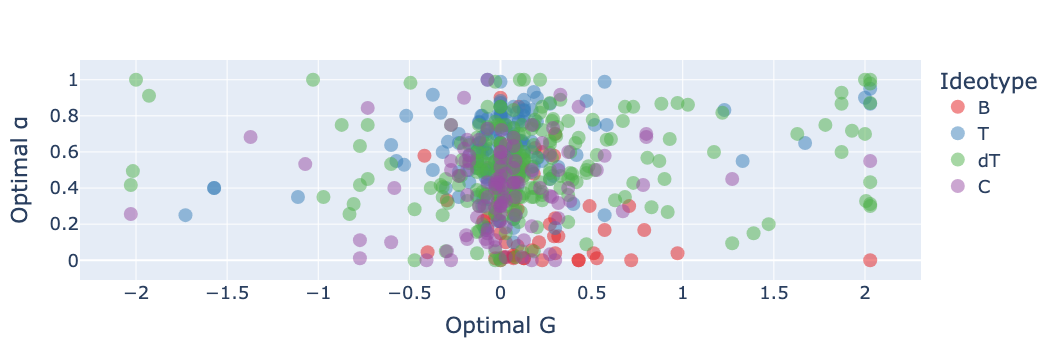

In [52]:
fig = px.scatter(
    ideotypes_df,
    x="optimal G",
    y="optimal alpha",
    color=ideotypes_df["ideotype (T/C/B)"].astype(str),
    hover_name="arbor name",
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set1,
)

fig.update_traces(marker=dict(size=14))
fig.update_layout(
    font=dict(size=18),
    legend_title_text="Ideotype",
    xaxis_title="Optimal G",
    yaxis_title="Optimal α",
    showlegend=True
)

fig.show()
fig.write_html("docs/Optimal_G_alpha_ideotypes.html")
fig.write_image("paper-figs/Ideotypes-Analysis/Optimal-alpha-vs-G.pdf")

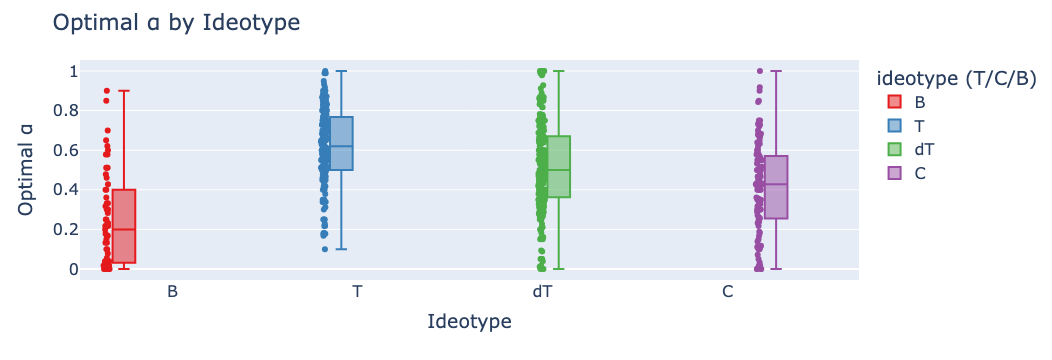

In [53]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    ideotypes_df,
    x="ideotype (T/C/B)",
    y="optimal alpha",
    color="ideotype (T/C/B)",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal α by Ideotype",
    xaxis_title="Ideotype",
    yaxis_title="Optimal α",
    font=dict(size=16),
    boxmode="group"
)

fig.show()
fig.write_image("paper-figs/Ideotypes-Analysis/Optimal-alpha-by-Ideotype.pdf")

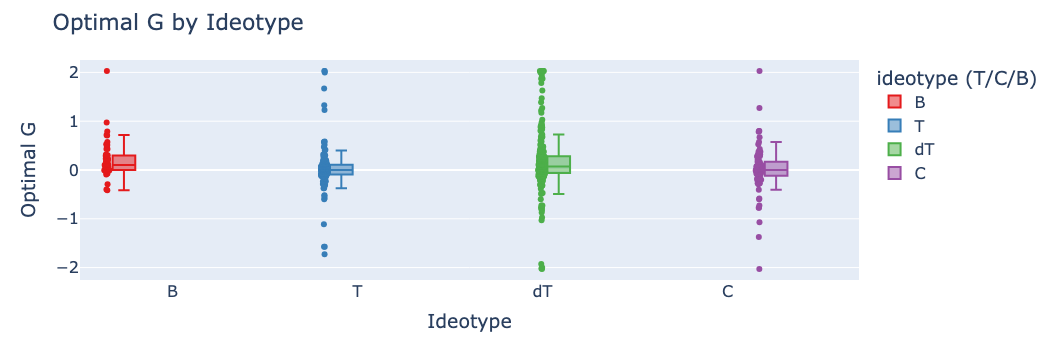

In [54]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    ideotypes_df,
    x="ideotype (T/C/B)",
    y="optimal G",
    color="ideotype (T/C/B)",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal G by Ideotype",
    xaxis_title="Ideotype",
    yaxis_title="Optimal G",
    font=dict(size=16),
    boxmode="group"
)

fig.show()
fig.write_image("paper-figs/Ideotypes-Analysis/Optimal-G-by-Ideotype.pdf")

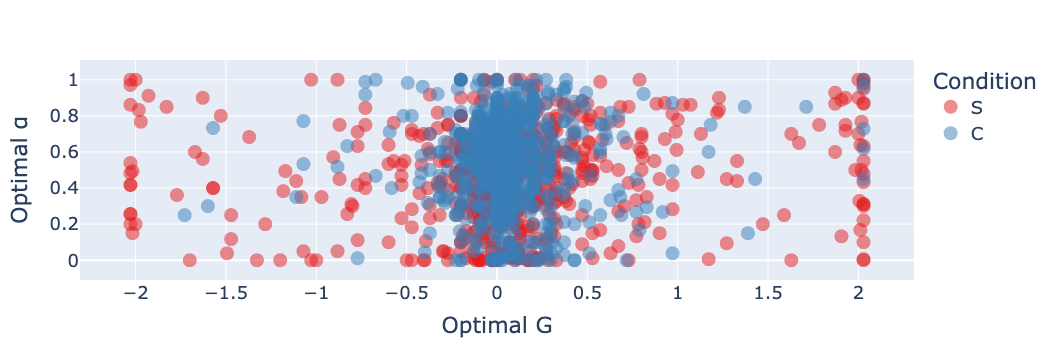

In [56]:
fig = px.scatter(
    arbor_stats_df,
    x="optimal G",
    y="optimal alpha",
    color=arbor_stats_df["condition"].astype(str),
    hover_name="arbor name",
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set1,
)

fig.update_traces(marker=dict(size=14))
fig.update_layout(
    font=dict(size=18),
    legend_title_text="Condition",
    xaxis_title="Optimal G",
    yaxis_title="Optimal α",
    showlegend=True
)

fig.show()
fig.write_html("docs/Optimal_G_alpha_condition.html")
fig.write_image("paper-figs/Salt-Control-Analysis/Optimal-alpha-vs-G-condition.pdf")

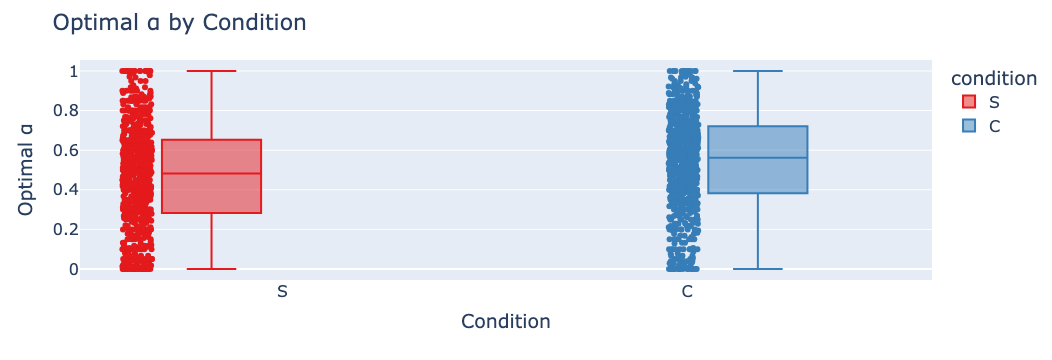

In [57]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    arbor_stats_df,
    x="condition",
    y="optimal alpha",
    color="condition",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal α by Condition",
    xaxis_title="Condition",
    yaxis_title="Optimal α",
    font=dict(size=16),
    boxmode="group"
)

fig.show()
fig.write_image("paper-figs/Salt-Control-Analysis/Optimal-alpha-by-condition.pdf")

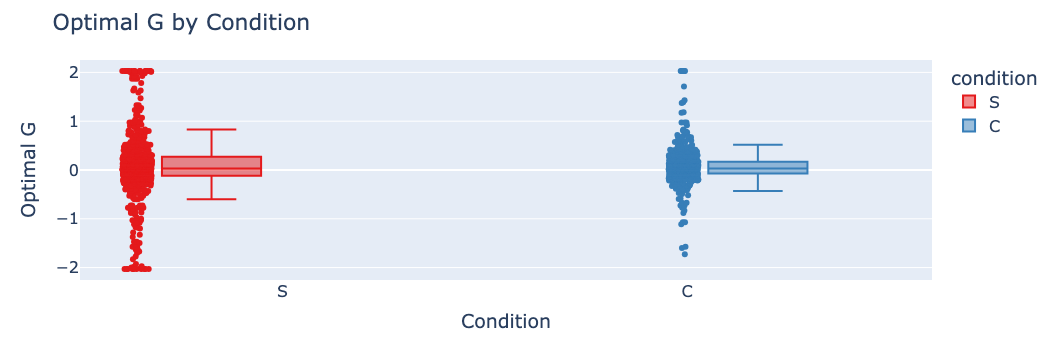

In [58]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    arbor_stats_df,
    x="condition",
    y="optimal G",
    color="condition",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal G by Condition",
    xaxis_title="Condition",
    yaxis_title="Optimal G",
    font=dict(size=16),
    boxmode="group"
)

fig.show()
fig.write_image("paper-figs/Salt-Control-Analysis/Optimal-G-by-condition.pdf")

In [16]:
hormone_df = arbor_stats_df.dropna(subset="hormone")
hormone_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
9,248_9_S_noiaa_day9,0.1000,1.0000,4.294807,PimpiIAA1,9,46,248,9,S,noiaa
11,LA1511_6_C_locyto_day9,-0.2000,0.5000,0.195330,PimpiCyto,9,26,LA1511,6,C,locyto
34,LA1511_9_C_noaba_day9,0.2000,0.3000,5.330447,PimpiABA,9,164,LA1511,9,C,noaba
38,LA1511_7_S_nocyto_day9,0.1000,0.5000,0.782134,PimpiCyto,9,54,LA1511,7,S,nocyto
39,la1511_2_S_1acc_day9,0.2000,0.4000,0.029065,PimpiACC,9,110,la1511,2,S,1acc
...,...,...,...,...,...,...,...,...,...,...,...
1484,058_3_S_noiaa_day9,-0.3286,0.7327,0.480647,PimpiIAA1,9,100,058,3,S,noiaa
1485,m248_4_C_1acc_day9,0.0000,0.7827,47.824094,PimpiACC,9,145,m248,4,C,1acc
1488,M058_1_S_1aba_day9,1.9060,0.1327,0.375290,PimpiABA,9,50,M058,1,S,1aba
1489,M248_2_C_nocyto_day9,0.0714,0.7613,9.336840,PimpiCyto,9,105,M248,2,C,nocyto


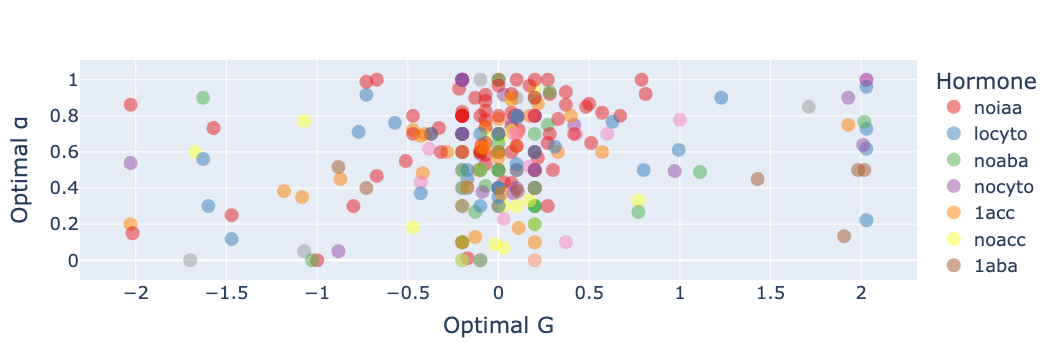

In [17]:
fig = px.scatter(
    hormone_df,
    x="optimal G",
    y="optimal alpha",
    color=hormone_df["hormone"].astype(str),
    hover_name="arbor name",
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set1,
)

fig.update_traces(marker=dict(size=14))
fig.update_layout(
    font=dict(size=18),
    legend_title_text="Hormone",
    xaxis_title="Optimal G",
    yaxis_title="Optimal α",
    showlegend=True
)

fig.show()
fig.write_html("docs/Optimal_G_alpha_hormone.html")

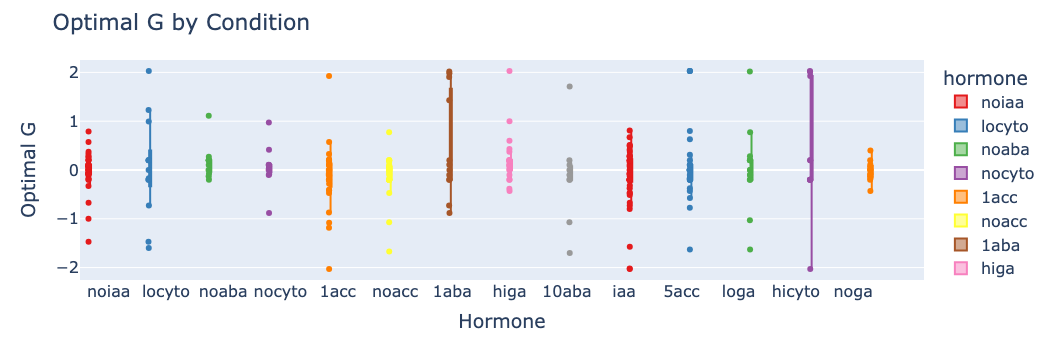

In [18]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    hormone_df,
    x="hormone",
    y="optimal G",
    color="hormone",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal G by Condition",
    xaxis_title="Hormone",
    yaxis_title="Optimal G",
    font=dict(size=16),
    boxmode="group"
)

fig.show()

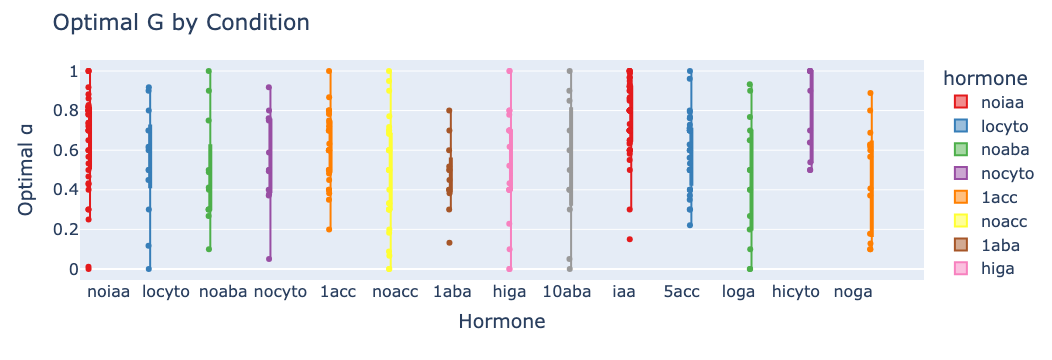

In [19]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    hormone_df,
    x="hormone",
    y="optimal alpha",
    color="hormone",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal G by Condition",
    xaxis_title="Hormone",
    yaxis_title="Optimal α",
    font=dict(size=16),
    boxmode="group"
)

fig.show()

# ANOVA Testing

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
model_alpha = ols(
    'Q("optimal alpha") ~ Q("ideotype (T/C/B)")',
    data=ideotypes_df
).fit()

anova_alpha = sm.stats.anova_lm(model_alpha, typ=2)
print(anova_alpha)

                         sum_sq     df          F        PR(>F)
Q("ideotype (T/C/B)")   6.62641    3.0  45.909906  1.426628e-26
Residual               27.27933  567.0        NaN           NaN


In [22]:
model_G = ols(
    'Q("optimal G") ~ Q("ideotype (T/C/B)")',
    data=ideotypes_df
).fit()

anova_G = sm.stats.anova_lm(model_G, typ=2)
print(anova_G)

                           sum_sq     df         F    PR(>F)
Q("ideotype (T/C/B)")    3.464672    3.0  4.082748  0.006956
Residual               160.387781  567.0       NaN       NaN


In [23]:
from pingouin import welch_anova

In [24]:
welch_anova(dv='optimal G', between='ideotype (T/C/B)', data=ideotypes_df)

,Source,ddof1,ddof2,F,p-unc,np2
0,ideotype (T/C/B),3,225.580591,4.931414,0.002453,0.021145


In [25]:
from statsmodels.multivariate.manova import MANOVA

In [26]:
manova = MANOVA.from_formula(
    'Q("optimal alpha") + Q("optimal G") ~ Q("ideotype (T/C/B)")',
    data=ideotypes_df
)

print(manova.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8799 2.0000 566.0000 38.6398 0.0000
          Pillai's trace 0.1201 2.0000 566.0000 38.6398 0.0000
  Hotelling-Lawley trace 0.1365 2.0000 566.0000 38.6398 0.0000
     Roy's greatest root 0.1365 2.0000 566.0000 38.6398 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
 Q("ideotype (T/C/B)")  Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.7816 6.0000 1132.0000 24.7403 0.0000
         Pillai's trace 0.2223 6.0000 1134.0000 23.6344 0.0000
 Hotelling-

In [27]:
model_G_conditional = ols(
    'Q("optimal G") ~ Q("ideotype (T/C/B)") + Q("optimal alpha")',
    data=ideotypes_df
).fit()

anova_G_conditional = sm.stats.anova_lm(model_G_conditional, typ=2)
print(anova_G_conditional)

                           sum_sq     df          F    PR(>F)
Q("ideotype (T/C/B)")    4.633067    3.0   5.548219  0.000930
Q("optimal alpha")       2.840777    1.0  10.205716  0.001478
Residual               157.547004  566.0        NaN       NaN


# PERMANOVA Test

In [28]:
import numpy as np
import pandas as pd
from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix
from scipy.spatial.distance import pdist, squareform

In [29]:
def run_permanova(df, variables, group_col, metric="euclidean", permutations=999):
    # Reset index to ensure alignment
    df = df.reset_index(drop=True)

    X = df[variables].values
    distances = squareform(pdist(X, metric=metric))

    ids = df.index.astype(str)
    dm = DistanceMatrix(distances, ids=ids)

    grouping = df[group_col]
    grouping.index = ids  # THIS LINE FIXES THE ERROR

    return permanova(dm, grouping, permutations=permutations)

In [30]:
permanova_alpha = run_permanova(
    ideotypes_df,
    variables=["optimal alpha"],
    group_col="ideotype (T/C/B)"
)

print(permanova_alpha)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     571
number of groups                  4
test statistic            45.909906
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


In [31]:
permanova_G = run_permanova(
    ideotypes_df,
    variables=["optimal G"],
    group_col="ideotype (T/C/B)"
)

print(permanova_G)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     571
number of groups                  4
test statistic             4.082748
p-value                       0.011
number of permutations          999
Name: PERMANOVA results, dtype: object


In [32]:
permanova_alpha_G = run_permanova(
    ideotypes_df,
    variables=["optimal alpha", "optimal G"],
    group_col="ideotype (T/C/B)"
)

print(permanova_alpha_G)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     571
number of groups                  4
test statistic            10.162753
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


Checking for homoskedacity

In [33]:
from scipy.stats import levene

# alpha
stat_alpha, p_alpha = levene(
    *[ideotypes_df.loc[ideotypes_df['ideotype (T/C/B)'] == x, 'optimal alpha'] 
      for x in ideotypes_df['ideotype (T/C/B)'].unique()]
)
print(stat_alpha, p_alpha)

# G
stat_G, p_G = levene(
    *[ideotypes_df.loc[ideotypes_df['ideotype (T/C/B)'] == x, 'optimal G'] 
      for x in ideotypes_df['ideotype (T/C/B)'].unique()]
)
print(stat_G, p_G)

1.4343415880745287 0.23175065424474459
4.409074750816471 0.004452612828975242


Test for normal residuals

In [34]:
from scipy.stats import shapiro

In [35]:
# residuals from G ~ ideotype + alpha
residuals = model_G_conditional.resid
stat, p = shapiro(residuals)
print(f'Shapiro-Wilk test: W={stat:.3f}, p={p:.3f}')

Shapiro-Wilk test: W=0.809, p=0.000


# Intraclass Correlation

In [36]:
# Fit one-way ANOVA: optimal alpha ~ ideotype
model_alpha = ols('Q("optimal alpha") ~ C(Q("ideotype (T/C/B)"))', data=ideotypes_df).fit()

# Get ANOVA table
anova_alpha = sm.stats.anova_lm(model_alpha, typ=2)

# Mean squares using .iloc to avoid warnings
MS_between = anova_alpha['sum_sq'].iloc[0] / anova_alpha['df'].iloc[0]
MS_within = anova_alpha['sum_sq'].iloc[1] / anova_alpha['df'].iloc[1]

# Average group size (handles unbalanced design)
k_avg = ideotypes_df.groupby('ideotype (T/C/B)').size().mean()

# Compute ICC
icc_alpha = (MS_between - MS_within) / (MS_between + (k_avg - 1) * MS_within)
print(f'ICC for alpha by ideotype: {icc_alpha:.4f}')

ICC for alpha by ideotype: 0.2393


In [37]:
# Fit one-way ANOVA: optimal alpha ~ ideotype
model_alpha = ols('Q("optimal G") ~ C(Q("ideotype (T/C/B)"))', data=ideotypes_df).fit()

# Get ANOVA table
anova_alpha = sm.stats.anova_lm(model_alpha, typ=2)

# Mean squares
MS_between = anova_alpha['sum_sq'].iloc[0] / anova_alpha['df'].iloc[0]
MS_within = anova_alpha['sum_sq'].iloc[1] / anova_alpha['df'].iloc[1]

# Average group size (k)
k_avg = ideotypes_df.groupby('ideotype (T/C/B)').size().mean()

# Compute ICC
icc_G = (MS_between - MS_within) / (MS_between + (k_avg - 1) * MS_within)
print(f'ICC for alpha by ideotype: {icc_G:.4f}')


ICC for alpha by ideotype: 0.0211


In [38]:
# 1. Fit linear model: G ~ alpha
model = ols('Q("optimal G") ~ Q("optimal alpha")', data=ideotypes_df).fit()

# 2. Compute residuals (G variation not explained by alpha)
ideotypes_df['G_resid'] = model.resid

# 3. One-way ANOVA of residuals ~ ideotype
model_resid = ols('G_resid ~ C(Q("ideotype (T/C/B)"))', data=ideotypes_df).fit()
anova_resid = sm.stats.anova_lm(model_resid, typ=2)

# 4. Mean squares
MS_between = anova_resid['sum_sq'].iloc[0] / anova_resid['df'].iloc[0]
MS_within = anova_resid['sum_sq'].iloc[1] / anova_resid['df'].iloc[1]

# 5. Average group size (handles unbalanced design)
k_avg = ideotypes_df.groupby('ideotype (T/C/B)').size().mean()

# 6. Conditional ICC
icc_conditional = (MS_between - MS_within) / (MS_between + (k_avg - 1) * MS_within)
print(f'Conditional ICC for G after alpha by ideotype: {icc_conditional:.4f}')

Conditional ICC for G after alpha by ideotype: 0.0287


# Test for equal variance

In [39]:
from scipy.stats import levene

# Subset salt (S) and control (C)
G_salt = arbor_stats_df.loc[arbor_stats_df['condition'] == 'S', 'optimal G']
G_control = arbor_stats_df.loc[arbor_stats_df['condition'] == 'C', 'optimal G']

# Levene's test (robust to non-normality)
stat, p = levene(G_salt, G_control, center='median')
print(f"Levene test for G variance (S vs C): stat={stat:.4f}, p={p:.4f}")

Levene test for G variance (S vs C): stat=101.7151, p=0.0000


In [40]:
ideotype_list = ideotypes_df['ideotype (T/C/B)'].unique()

for ideotype in ideotype_list:
    subset = ideotypes_df[ideotypes_df['ideotype (T/C/B)'] == ideotype]
    G_salt = subset.loc[subset['condition'] == 'S', 'optimal G']
    G_control = subset.loc[subset['condition'] == 'C', 'optimal G']
    
    stat, p = levene(G_salt, G_control, center='median')
    print(f"Ideotype {ideotype}: Levene stat={stat:.4f}, p={p:.4f}")


Ideotype B: Levene stat=1.5197, p=0.2227
Ideotype T: Levene stat=34.5682, p=0.0000
Ideotype dT: Levene stat=21.8611, p=0.0000
Ideotype C: Levene stat=2.5569, p=0.1129


In [41]:
import numpy as np
from scipy.stats import f

In [42]:
# Function for two-tailed F-test
def f_test_variance(group1, group2):
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    
    # Put larger variance in numerator
    if var1 > var2:
        F_stat = var1 / var2
        dfn, dfd = n1 - 1, n2 - 1
    else:
        F_stat = var2 / var1
        dfn, dfd = n2 - 1, n1 - 1
    
    # Two-tailed p-value
    p_value = 2 * min(f.cdf(F_stat, dfn, dfd), 1 - f.cdf(F_stat, dfn, dfd))
    return F_stat, dfn, dfd, p_value

In [43]:
# Overall F-test
G_salt = arbor_stats_df.loc[arbor_stats_df['condition'] == 'S', 'optimal G']
G_control = arbor_stats_df.loc[arbor_stats_df['condition'] == 'C', 'optimal G']
F_stat, dfn, dfd, p_value = f_test_variance(G_salt, G_control)
print(f"Overall F-test: F={F_stat:.4f}, df1={dfn}, df2={dfd}, p={p_value:.4f}")

Overall F-test: F=4.4706, df1=735, df2=754, p=0.0000


In [44]:
# Per ideotype
ideotype_list = ideotypes_df['ideotype (T/C/B)'].unique()
for ideotype in ideotype_list:
    subset = ideotypes_df[ideotypes_df['ideotype (T/C/B)'] == ideotype]
    G_salt = subset.loc[subset['condition'] == 'S', 'optimal G']
    G_control = subset.loc[subset['condition'] == 'C', 'optimal G']
    
    if len(G_salt) < 2 or len(G_control) < 2:
        print(f"Ignoring ideotype {ideotype}: not enough samples")
        continue
    
    F_stat, dfn, dfd, p_value = f_test_variance(G_salt, G_control)
    print(f"Ideotype {ideotype}: F={F_stat:.4f}, df1={dfn}, df2={dfd}, p={p_value:.4f}")

Ideotype B: F=3.7075, df1=15, df2=42, p=0.0008
Ideotype T: F=10.7827, df1=37, df2=117, p=0.0000
Ideotype dT: F=6.6333, df1=154, df2=95, p=0.0000
Ideotype C: F=3.0318, df1=69, df2=34, p=0.0007


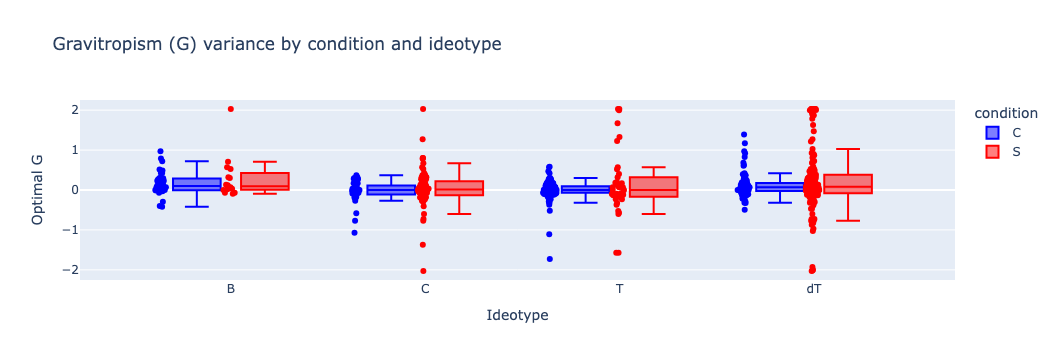

In [60]:
# Create the boxplot
fig = px.box(
    ideotypes_df,
    x="ideotype (T/C/B)",
    y="optimal G",
    color="condition",           # 'S' vs 'C'
    points="all",                # show all points for clarity
    color_discrete_map={"C":"blue","S":"red"},  # choose distinct colors
    title="Gravitropism (G) variance by condition and ideotype"
)

# Customize
fig.update_layout(
    yaxis_title="Optimal G",
    xaxis_title="Ideotype",
    boxmode="group"             # side-by-side for S and C"
)

fig.show()
fig.write_image("paper-figs/Salt-Control-Analysis/Optimal-G-by-condition-ideotype.pdf")

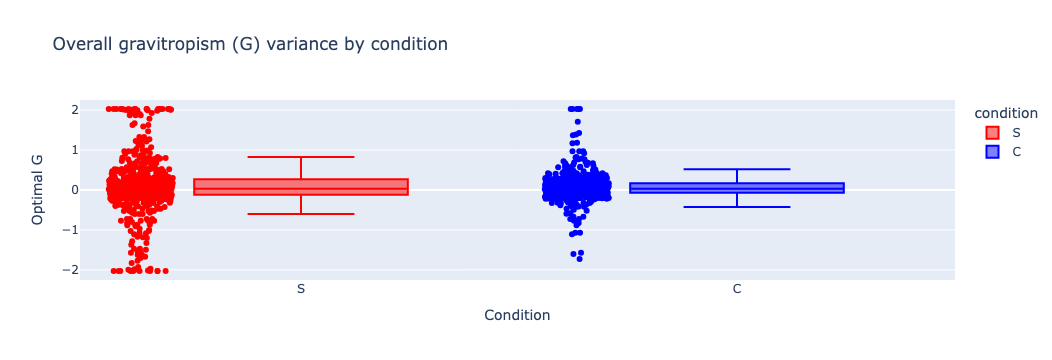

In [61]:
fig2 = px.box(
    arbor_stats_df,
    x="condition",
    y="optimal G",
    color="condition",
    color_discrete_map={"C":"blue","S":"red"},
    points="all",
    title="Overall gravitropism (G) variance by condition"
)

fig2.update_layout(yaxis_title="Optimal G", xaxis_title="Condition")
fig2.show()

Test for interaction effect

In [47]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [48]:
model_interaction = smf.ols(
    'Q("optimal G") ~ Q("optimal alpha") * Q("ideotype (T/C/B)")',
    data=ideotypes_df
).fit()


In [49]:
anova_interaction = anova_lm(model_interaction, typ=2)
anova_interaction

,sum_sq,df,F,PR(>F)
"Q(""ideotype (T/C/B)"")",4.633067,3.0,5.606798,0.000859
"Q(""optimal alpha"")",2.840777,1.0,10.313470,0.001396
"Q(""optimal alpha""):Q(""ideotype (T/C/B)"")",2.472363,3.0,2.991979,0.030470
Residual,155.074641,563.0,NaN,NaN


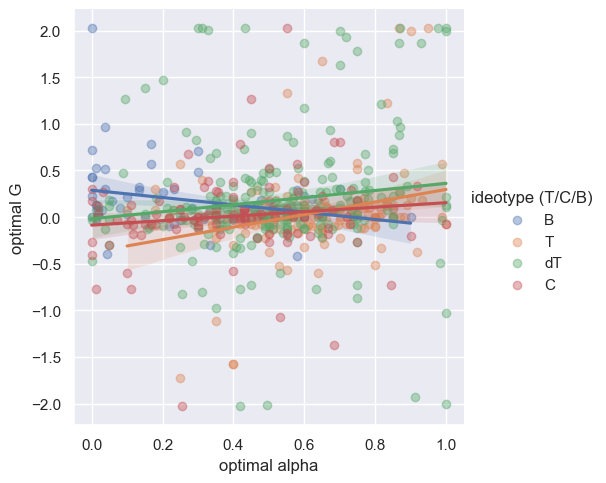

In [62]:
sns.set()
sns.lmplot(
    data=ideotypes_df,
    x="optimal alpha",
    y="optimal G",
    hue="ideotype (T/C/B)",
    scatter_kws={"alpha": 0.4},
    ci=95
)